### This jupyter notebooks provides the code to give an introduction to the PyWavelets library. 
### To get some more background information, please have a look at the accompanying blog-post:
### http://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

In [65]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# 1. Which Wavelets are present in PyWavelets?

In [66]:
wavelet_families = pywt.families(short=False)
discrete_mother_wavelets = pywt.wavelist(kind='discrete')
continuous_mother_wavelets = pywt.wavelist(kind='continuous')

print("PyWavelets contains the following families: ")
print(wavelet_families)
print()
print("PyWavelets contains the following Continuous families: ")
print(continuous_mother_wavelets)
print()
print("PyWavelets contains the following Discrete families: ")
print(discrete_mother_wavelets)
print()
for family in pywt.families():
    print("    * The {} family contains: {}".format(family, pywt.wavelist(family)))

PyWavelets contains the following families: 
['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']

PyWavelets contains the following Continuous families: 
['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']

PyWavelets contains the following Discrete families: 
['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7'

# 2. Visualizing several Discrete and Continuous wavelets

/usr/local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


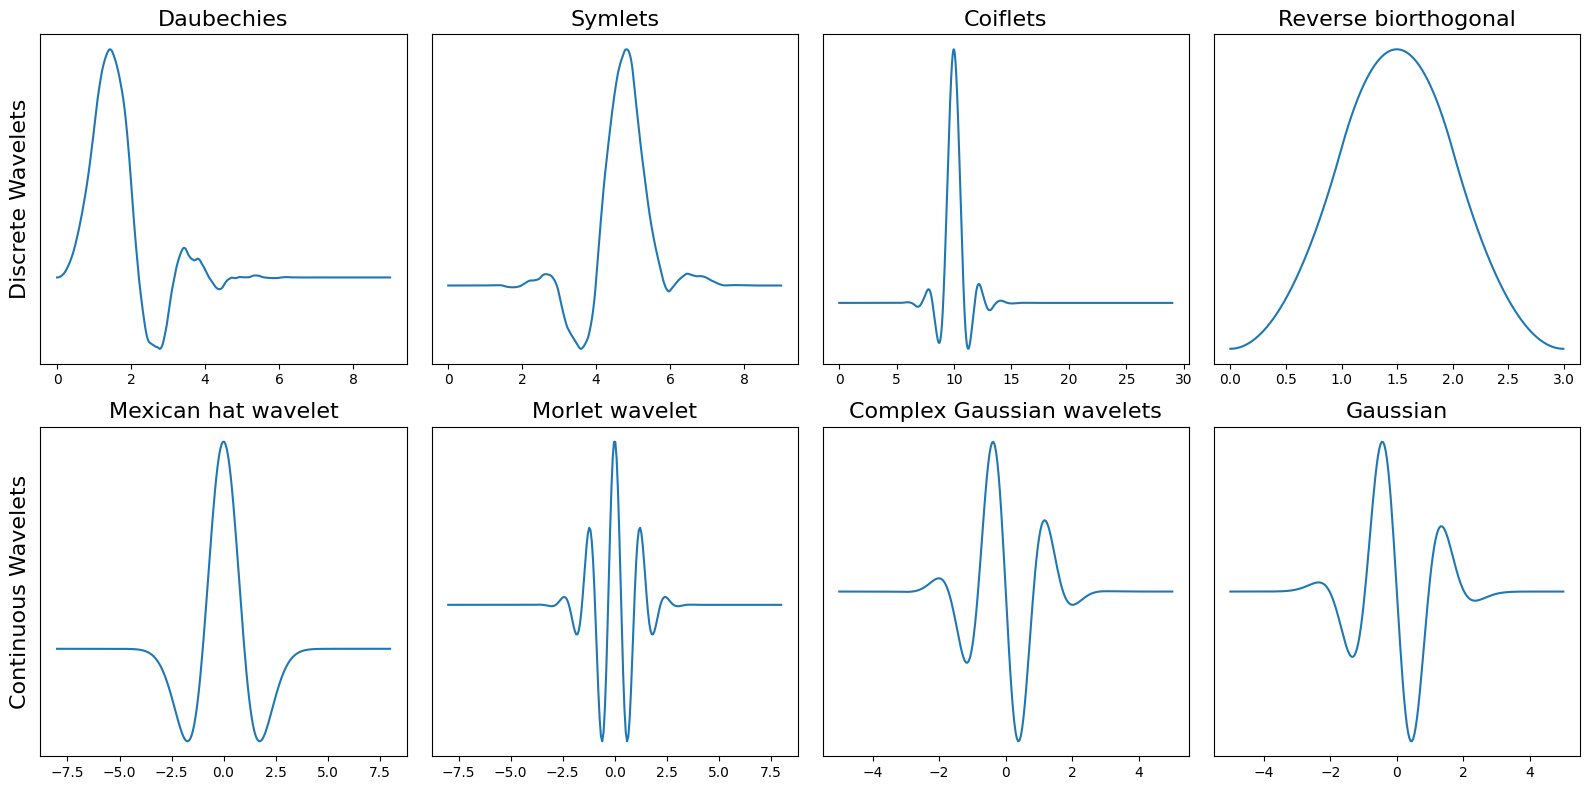

In [67]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'rbio3.1']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        #print(family_name)
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        #print(orthogonal)
        if ii == 0:
            # Discrete Wavelets have three dimensions
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            # Continuous Wavelets have two dimensions
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
        #break

plt.tight_layout()
plt.show()

## Print Descrete Wavelet in R3

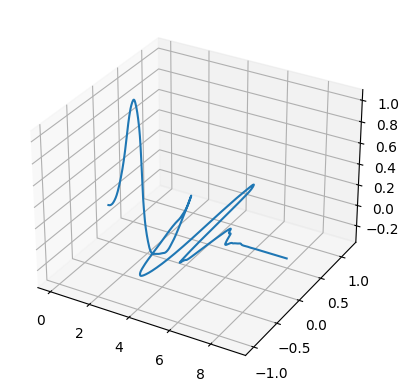

In [41]:
l = ['db5', 'sym5', 'coif5', 'bior2.4']
func = pywt.Wavelet

wavelet = func(l[0])

ax = plt.figure().add_subplot(projection='3d')

x = wavelet.wavefun()[2]
y = wavelet.wavefun()[1]
z = wavelet.wavefun()[0]

ax.plot(x, y, z, label='parametric curve')

In [9]:
_[1]

6.907210260457361e-06

## 3. Visualizing how the wavelet form depends on the order and decomposition level

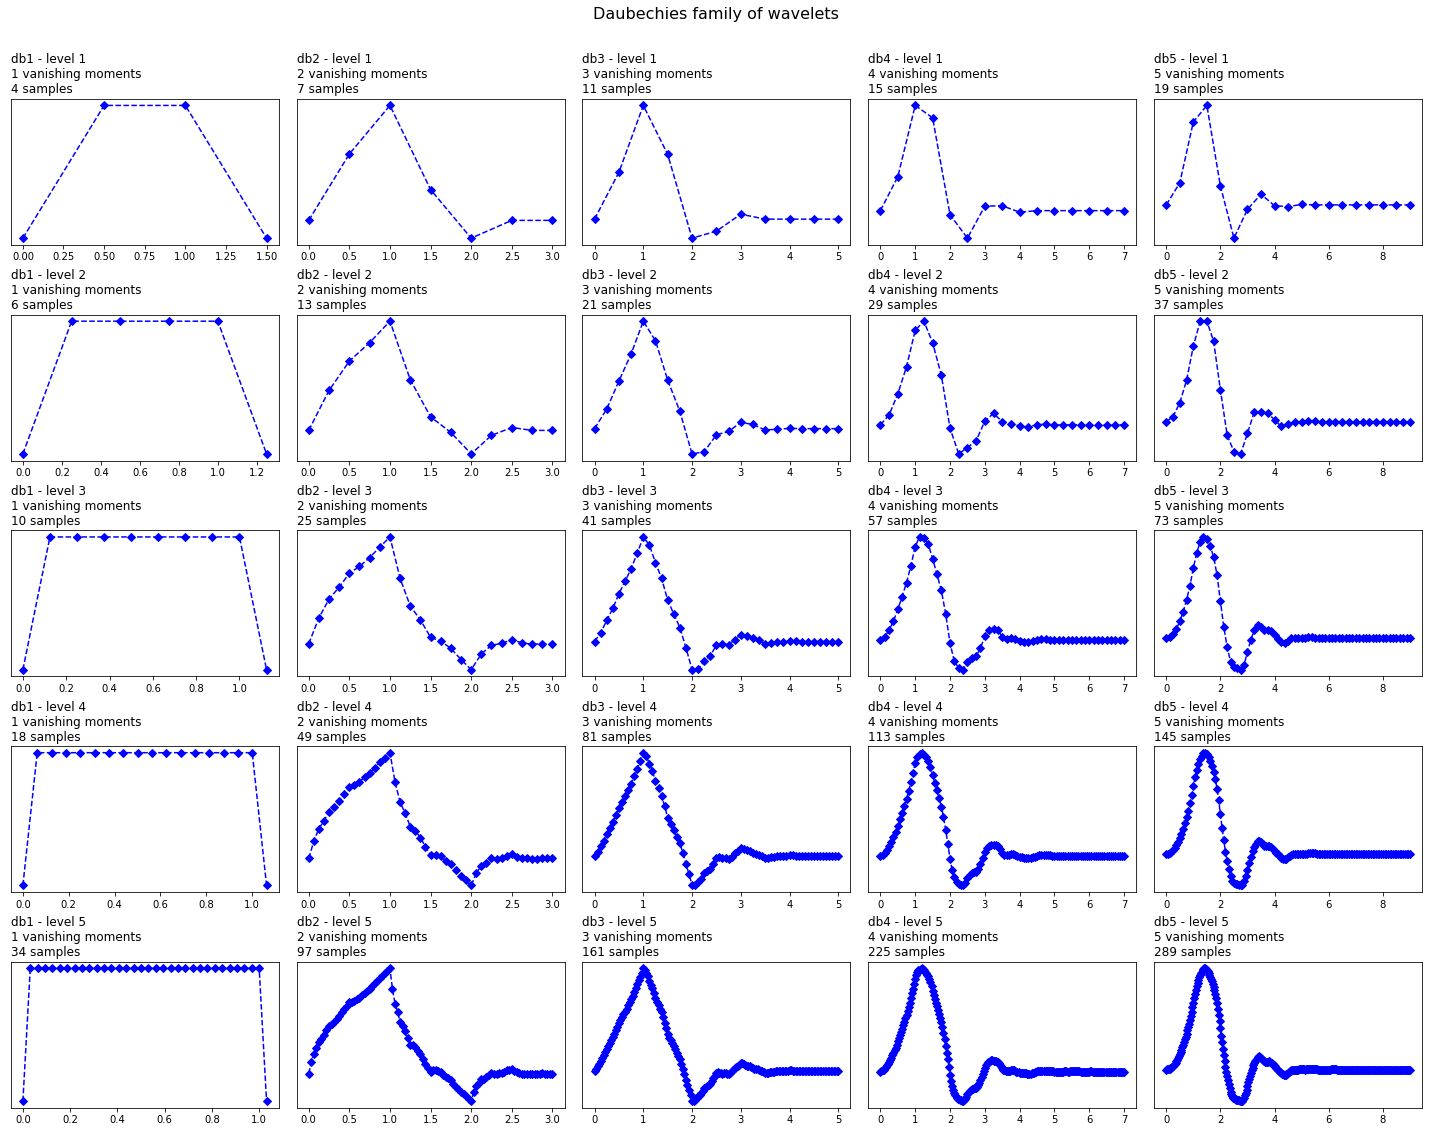

In [4]:
fig, axarr = plt.subplots(ncols=5, nrows=5, figsize=(20,16))
fig.suptitle('Daubechies family of wavelets', fontsize=16)

db_wavelets = pywt.wavelist('db')[:5]
for col_no, waveletname in enumerate(db_wavelets):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    family_name = wavelet.family_name
    for row_no, level in enumerate(range(1,6)):
        wavelet_function, scaling_function, x_values = wavelet.wavefun(level = level)
        axarr[row_no, col_no].set_title("{} - level {}\n{} vanishing moments\n{} samples".format(
            waveletname, level, no_moments, len(x_values)), loc='left')
        axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In the first column we can see the Daubechies wavelets of the first order ( db1), in the second column of the second order (db2), up to the fifth order in the fifth column. PyWavelets contains Daubechies wavelets up to order 20 (db20).

The number of the order indicates the number of vanishing moments. So db3 has three vanishing moments and db5 has 5 vanishing moment. The number of vanishing moments is related to the approximation order and smoothness of the wavelet. If a wavelet has p vanishing moments, it can approximate polynomials of degree p – 1.

When selecting a wavelet, we can also indicate what the level of decomposition has to be. By default, PyWavelets chooses the maximum level of decomposition possible for the input signal. The maximum level of decomposition (see pywt.dwt_max_level()) depends on the length of the input signal length and the wavelet (more on this later).

As we can see, as the number of vanishing moments increases, the polynomial degree of the wavelet increases and it becomes smoother. And as the level of decomposition increases, the number of samples this wavelet is expressed in increases.

## Discrete Wavelet Transform: The DWT as a filter-bank

In practice, the DWT is always implemented as a filter-bank. This means that it is implemented as a cascade of high-pass and low-pass filters. This is because filter banks are a very efficient way of splitting a signal of into several frequency sub-bands.
Below I will try to explain the concept behind the filter-bank in a simple (and probably oversimplified) way. It is necessary in order to understand how the wavelet transform actually works and can be used in practical applications.

## 4.A Using the pywt.dwt() for the decomposition of a signal into the frequency sub-bands
### (and reconstrucing it again)

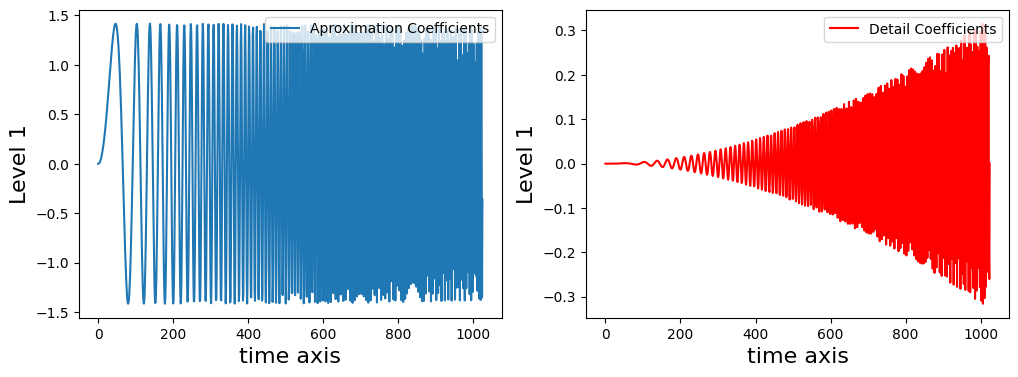

In [63]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,4))
ax[0].plot(cA1, label='Aproximation Coefficients')
ax[0].legend(loc='upper right')
#ax.set_title('single reconstruction', fontsize=20)
ax[0].set_xlabel('time axis', fontsize=16)
ax[0].set_ylabel('Level 1', fontsize=16)

ax[1].plot(cD1, label='Detail Coefficients', color = 'r')
ax[1].legend(loc='upper right')
#ax.set_title('single reconstruction', fontsize=20)
ax[1].set_xlabel('time axis', fontsize=16)
ax[1].set_ylabel('Level 1', fontsize=16)

plt.show()

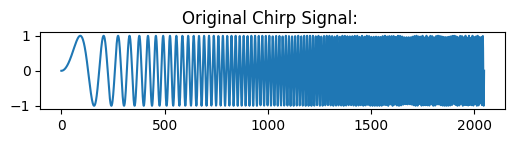

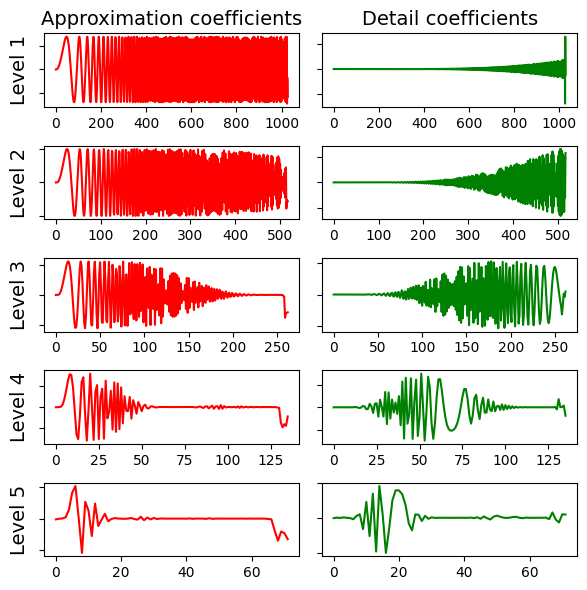

In [64]:
x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

In the figure above we can see our chirp signal, and the DWT applied to it subsequently. There are a few things to notice here:

In PyWavelets the DWT is applied with pywt.dwt()
The DWT return two sets of coefficients; the approximation coefficients and detail coefficients.
The approximation coefficients represent the output of the low pass filter (averaging filter) of the DWT.
The detail coefficients represent the output of the high pass filter (difference filter) of the DWT.
By applying the DWT again on the approximation coefficients of the previous DWT, we get the wavelet transform of the next level.
At each next level, the original signal is also sampled down by a factor of 2.
So now we have seen what it means that the DWT is implemented as a filter bank; At each subsequent level, the approximation coefficients are divided into a coarser low pass and high pass part and the DWT is applied again on the low-pass part.

As we can see, our original signal is now converted to several signals each corresponding to different frequency bands. Later on we will see how the approximation and detail coefficients at the different frequency sub-bands can be used in applications like removing high frequency noise from signals, compressing signals, or classifying the different types signals.

PS: We can also use pywt.wavedec() to immediately calculate the coefficients of a higher level. This functions takes as input the original signal and the level n and returns the one set of approximation coefficients (of the n-th level) and n sets of detail coefficients (1 to n-th level).

PS2: This idea of analyzing the signal on different scales is also known as multiresolution / multiscale analysis, and decomposing your signal in such a way is also known as multiresolution decomposition, or sub-band coding.

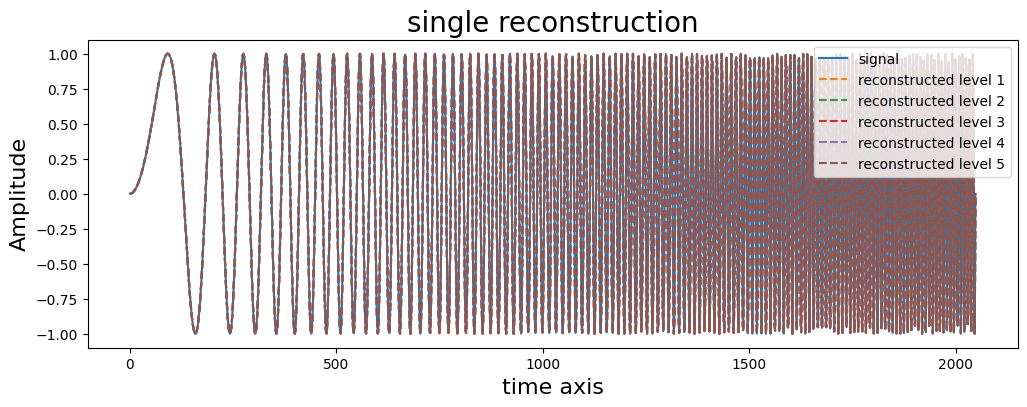

In [44]:
time = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * time**2)

(cA1, cD1) = pywt.dwt(chirp_signal, 'db2', 'smooth')
(cA2, cD2) = pywt.dwt(cA1, 'db2', 'smooth')
(cA3, cD3) = pywt.dwt(cA2, 'db2', 'smooth')
(cA4, cD4) = pywt.dwt(cA3, 'db2', 'smooth')
(cA5, cD5) = pywt.dwt(cA4, 'db2', 'smooth')

coefficients_level1 = [cA1, cD1]
coefficients_level2 = [cA2, cD2, cD1]
coefficients_level3 = [cA3, cD3, cD2, cD1]
coefficients_level4 = [cA4, cD4, cD3, cD2, cD1]
coefficients_level5 = [cA5, cD5, cD4, cD3, cD2, cD1]

reconstructed_signal_level1 = pywt.waverec(coefficients_level1, 'db2', 'smooth')
reconstructed_signal_level2 = pywt.waverec(coefficients_level2, 'db2', 'smooth')
reconstructed_signal_level3 = pywt.waverec(coefficients_level3, 'db2', 'smooth')
reconstructed_signal_level4 = pywt.waverec(coefficients_level4, 'db2', 'smooth')
reconstructed_signal_level5 = pywt.waverec(coefficients_level5, 'db2', 'smooth')

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(chirp_signal, label='signal')
ax.plot(reconstructed_signal_level1, label='reconstructed level 1', linestyle='--')
ax.plot(reconstructed_signal_level2, label='reconstructed level 2', linestyle='--')
ax.plot(reconstructed_signal_level3, label='reconstructed level 3', linestyle='--')
ax.plot(reconstructed_signal_level4, label='reconstructed level 4', linestyle='--')
ax.plot(reconstructed_signal_level5, label='reconstructed level 5', linestyle='--')
ax.legend(loc='upper right')
ax.set_title('single reconstruction', fontsize=20)
ax.set_xlabel('time axis', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
plt.show()


## 4.B Using the pywt.wavedec() for the decomposition of a signal into the frequency sub-bands
### (and reconstrucing it again)

- We can either apply pywt.dwt() on a signal to retrieve the approximation coefficients. Then apply the DWT on the retrieved coefficients to get the second level coefficients and continue this process until you have reached the desired decomposition level.

- Or we can apply pywt.wavedec() directly and retrieve all of the the detail coefficients up to some level n. This functions takes as input the original signal and the level n and returns the one set of approximation coefficients (of the n-th level) and n sets of detail coefficients (1 to n-th level).

In [92]:
ime = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * time**2)

coeff = pywt.wavedec(chirp_signal, 'db2', 'smooth')

### Decomposition and Reconstruction with DWT

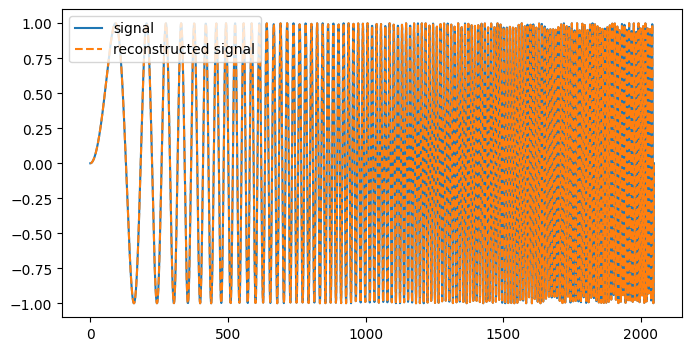

In [94]:
(cA1, cD1) = pywt.dwt(chirp_signal, 'db2', 'smooth')
reconstructed_signal = pywt.idwt(cA1, cD1, 'db2', 'smooth')
 
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(chirp_signal, label='signal')
ax.plot(reconstructed_signal, label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
plt.show()

### Decomposition and Reconstruction with Wavedec

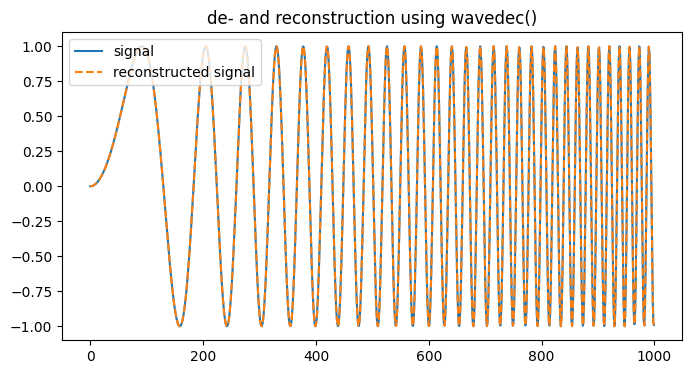

In [97]:
coeffs = pywt.wavedec(chirp_signal, 'db2', level=8)
reconstructed_signal = pywt.waverec(coeffs, 'db2')
 
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(chirp_signal[:1000], label='signal')
ax.plot(reconstructed_signal[:1000], label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
ax.set_title('de- and reconstruction using wavedec()')
plt.show()

### Analysis and Visualization of Frequency Subbands

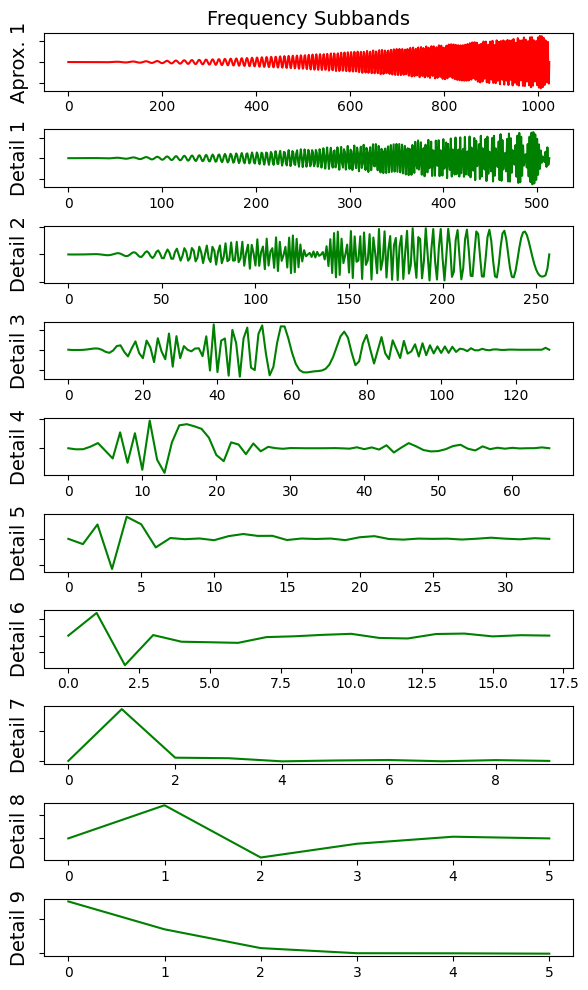

In [90]:
fig, axarr = plt.subplots(nrows=len(coeff), ncols=1, figsize=(6,10))
for ii in range(len(coeff)):
    
    if ii == 0:
        axarr[0].set_title("Frequency Subbands", fontsize=14)
        axarr[ii].set_ylabel("Aprox. {}".format(ii + 1), fontsize=14, rotation=90)
        axarr[ii].plot(coeff[ii], 'r')
        axarr[ii].set_yticklabels([])
    else:
        axarr[ii].set_ylabel("Detail {}".format(ii), fontsize=14, rotation=90)
        axarr[ii].plot(coeff[ii], 'g')
        axarr[ii].set_yticklabels([])
plt.tight_layout()
plt.show()a

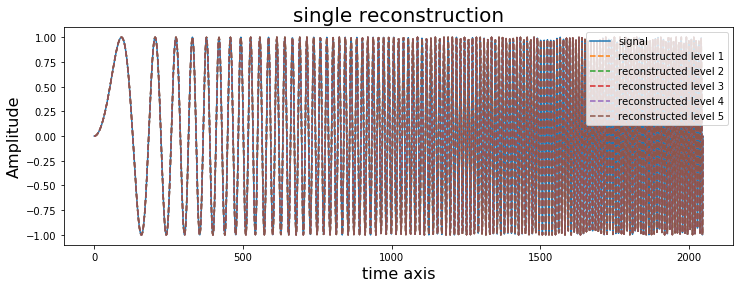

In [6]:

reconstructed_signal_level1 = pywt.waverec(coefficients_level1, 'db2', 'smooth')
reconstructed_signal_level2 = pywt.waverec(coefficients_level2, 'db2', 'smooth')
reconstructed_signal_level3 = pywt.waverec(coefficients_level3, 'db2', 'smooth')
reconstructed_signal_level4 = pywt.waverec(coefficients_level4, 'db2', 'smooth')
reconstructed_signal_level5 = pywt.waverec(coefficients_level5, 'db2', 'smooth')

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(chirp_signal, label='signal')
ax.plot(reconstructed_signal_level1, label='reconstructed level 1', linestyle='--')
ax.plot(reconstructed_signal_level2, label='reconstructed level 2', linestyle='--')
ax.plot(reconstructed_signal_level3, label='reconstructed level 3', linestyle='--')
ax.plot(reconstructed_signal_level4, label='reconstructed level 4', linestyle='--')
ax.plot(reconstructed_signal_level5, label='reconstructed level 5', linestyle='--')
ax.legend(loc='upper right')
ax.set_title('single reconstruction', fontsize=20)
ax.set_xlabel('time axis', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
plt.show()


## Removing (high-frequency) noise using the DWT

In the previous section we have seen how we can deconstruct a signal into the approximation (low pass) and detail (high pass) coefficients. If we reconstruct the signal using these coefficients we will get the original signal back.

But what happens if we reconstruct while we leave out some detail coefficients? Since the detail coefficients represent the high frequency part of the signal, we will simply have filtered out that part of the frequency spectrum. If you have a lot of high-frequency noise in your signal, this one way to filter it out.
Leaving out of the detail coefficients can be done using pywt.threshold(), which removes coefficient values higher than the given threshold.

Lets demonstrate this using NASA’s Femto Bearing Dataset. This is a dataset containing high frequency sensor data regarding accelerated degradation of bearings.

In [122]:
time = np.linspace(0, 1, num=2048)

chirp_signal_noise = [np.sin(250 * np.pi * x**2) + np.random.normal(10, 8**2)*np.random.choice([-1,1]) for x in time]

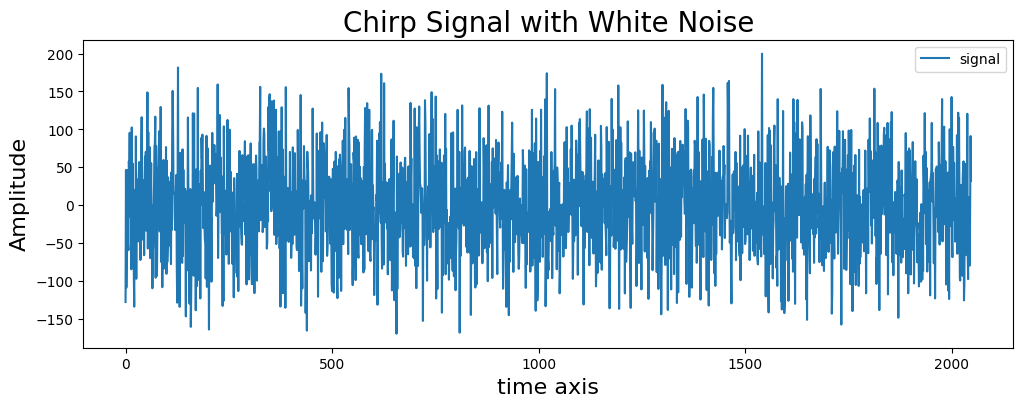

In [130]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(chirp_signal_noise, label='signal')
ax.legend(loc='upper right')
ax.set_title('Chirp Signal with White Noise', fontsize=20)
ax.set_xlabel('time axis', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
plt.show()

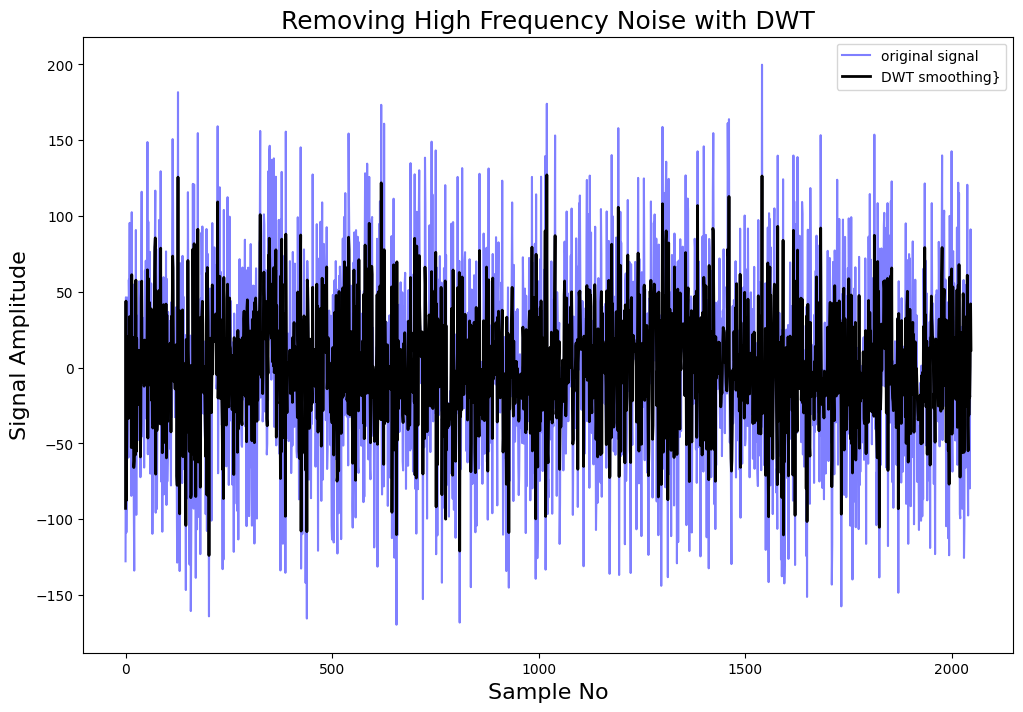

In [131]:
def lowpassfilter(signal, thresh = 0.63, wavelet="db4"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(chirp_signal_noise, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(chirp_signal_noise, 0.2)
ax.plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.show()



## 5. Reconstrucing a signal with only one level of coefficients

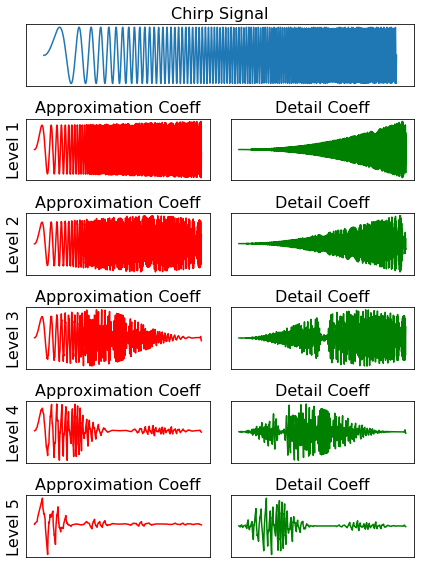

In [7]:
fig = plt.figure(figsize=(6,8))
spec = gridspec.GridSpec(ncols=2, nrows=6)
ax0 = fig.add_subplot(spec[0, 0:2])
ax1a = fig.add_subplot(spec[1, 0])
ax1b = fig.add_subplot(spec[1, 1])
ax2a = fig.add_subplot(spec[2, 0])
ax2b = fig.add_subplot(spec[2, 1])
ax3a = fig.add_subplot(spec[3, 0])
ax3b = fig.add_subplot(spec[3, 1])
ax4a = fig.add_subplot(spec[4, 0])
ax4b = fig.add_subplot(spec[4, 1])
ax5a = fig.add_subplot(spec[5, 0])
ax5b = fig.add_subplot(spec[5, 1])
axarr = np.array([[ax1a, ax1b],[ax2a, ax2b],[ax3a, ax3b],[ax4a, ax4b],[ax5a, ax5b]])

time = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * time**2)


# First we reconstruct a signal using pywt.wavedec() as we have also done at #4.2
coefficients_level1 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=1)
coefficients_level2 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=2)
coefficients_level3 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=3)
coefficients_level4 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=4)
coefficients_level5 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=5)

# pywt.wavedec() returns a list of coefficients. Below we assign these list of coefficients to variables explicitely.
[cA1_l1, cD1_l1] = coefficients_level1
[cA2_l2, cD2_l2, cD1_l2] = coefficients_level2
[cA3_l3, cD3_l3, cD2_l3, cD1_l3] = coefficients_level3
[cA4_l4, cD4_l4, cD3_l4, cD2_l4, cD1_l4] = coefficients_level4
[cA5_l5, cD5_l5, cD4_l5, cD3_l5, cD2_l5, cD1_l5] = coefficients_level5

# Since the the list of coefficients have been assigned explicitely to variables, we can set a few of them to zero.
approx_coeff_level1_only = [cA1_l1, None]
detail_coeff_level1_only = [None, cD1_l1]

approx_coeff_level2_only = [cA2_l2, None, None]
detail_coeff_level2_only = [None, cD2_l2, None]

approx_coeff_level3_only = [cA3_l3, None, None, None]
detail_coeff_level3_only = [None, cD3_l3, None, None]

approx_coeff_level4_only = [cA4_l4, None, None, None, None]
detail_coeff_level4_only = [None, cD4_l4, None, None, None]

approx_coeff_level5_only = [cA5_l5, None, None, None, None, None]
detail_coeff_level5_only = [None, cD5_l5, None, None, None, None]


# By reconstrucing the signal back from only one set of coefficients, we can see how 
# the frequency-sub band for that specific set of coefficient looks like
rec_signal_cA_level1 = pywt.waverec(approx_coeff_level1_only, 'db2', 'smooth')
rec_signal_cD_level1 = pywt.waverec(detail_coeff_level1_only, 'db2', 'smooth')

rec_signal_cA_level2 = pywt.waverec(approx_coeff_level2_only, 'db2', 'smooth')
rec_signal_cD_level2 = pywt.waverec(detail_coeff_level2_only, 'db2', 'smooth')

rec_signal_cA_level3 = pywt.waverec(approx_coeff_level3_only, 'db2', 'smooth')
rec_signal_cD_level3 = pywt.waverec(detail_coeff_level3_only, 'db2', 'smooth')

rec_signal_cA_level4 = pywt.waverec(approx_coeff_level4_only, 'db2', 'smooth')
rec_signal_cD_level4 = pywt.waverec(detail_coeff_level4_only, 'db2', 'smooth')

rec_signal_cA_level5 = pywt.waverec(approx_coeff_level5_only, 'db2', 'smooth')
rec_signal_cD_level5 = pywt.waverec(detail_coeff_level5_only, 'db2', 'smooth')


ax0.set_title("Chirp Signal", fontsize=16)
ax0.plot(time, chirp_signal)
ax0.set_xticks([])
ax0.set_yticks([])
ax1a.plot(rec_signal_cA_level1, color='red')
ax1b.plot(rec_signal_cD_level1, color='green')
ax2a.plot(rec_signal_cA_level2, color='red')
ax2b.plot(rec_signal_cD_level2, color='green')
ax3a.plot(rec_signal_cA_level3, color='red')
ax3b.plot(rec_signal_cD_level3, color='green')
ax4a.plot(rec_signal_cA_level4, color='red')
ax4b.plot(rec_signal_cD_level4, color='green')
ax5a.plot(rec_signal_cA_level5, color='red')
ax5b.plot(rec_signal_cD_level5, color='green')

for ii in range(0,5):
    axarr[ii,0].set_xticks([])
    axarr[ii,0].set_yticks([])
    axarr[ii,1].set_xticks([])
    axarr[ii,1].set_yticks([])
    axarr[ii,0].set_title("Approximation Coeff", fontsize=16)
    axarr[ii,1].set_title("Detail Coeff", fontsize=16)
    axarr[ii,0].set_ylabel("Level {}".format(ii+1), fontsize=16)
plt.tight_layout()
plt.show()